In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.markers


In [3]:
# Load the CSV data into a DataFrame
data = pd.read_csv('results/comparative_analysis.csv')

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

                        model  num_shots    dataset  train_accuracy  \
0  BiLSTM-attention-glove100D        NaN   original          1.0000   
1       LSTM-Conv1D-glove100D        NaN   original          0.9848   
2               CNN-glove100D        NaN   original          0.9804   
3      2-layer-LSTM-glove100D        NaN   original          0.9982   
4  BiLSTM-attention-glove100D        NaN  augmented          1.0000   

   val_accuracy  test_accuracy  precision  recall  f1_score  
0        0.8500         0.8167       0.82    0.82      0.82  
1        0.5250         0.8625       0.86    0.86      0.86  
2        0.8333         0.8333       0.83    0.83      0.83  
3        0.8625         0.8625       0.86    0.86      0.86  
4        0.9561         0.9434       0.94    0.94      0.94  


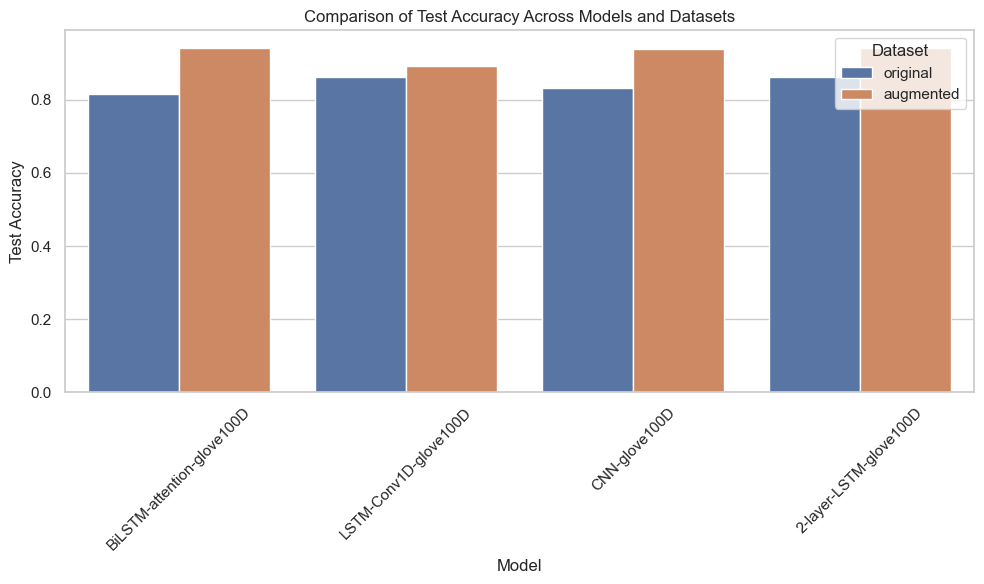

In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for test accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='test_accuracy', hue='dataset', data=data)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy Across Models and Datasets')
plt.xticks(rotation=45)
plt.legend(title='Dataset')

# Show the plot
plt.tight_layout()
plt.show()

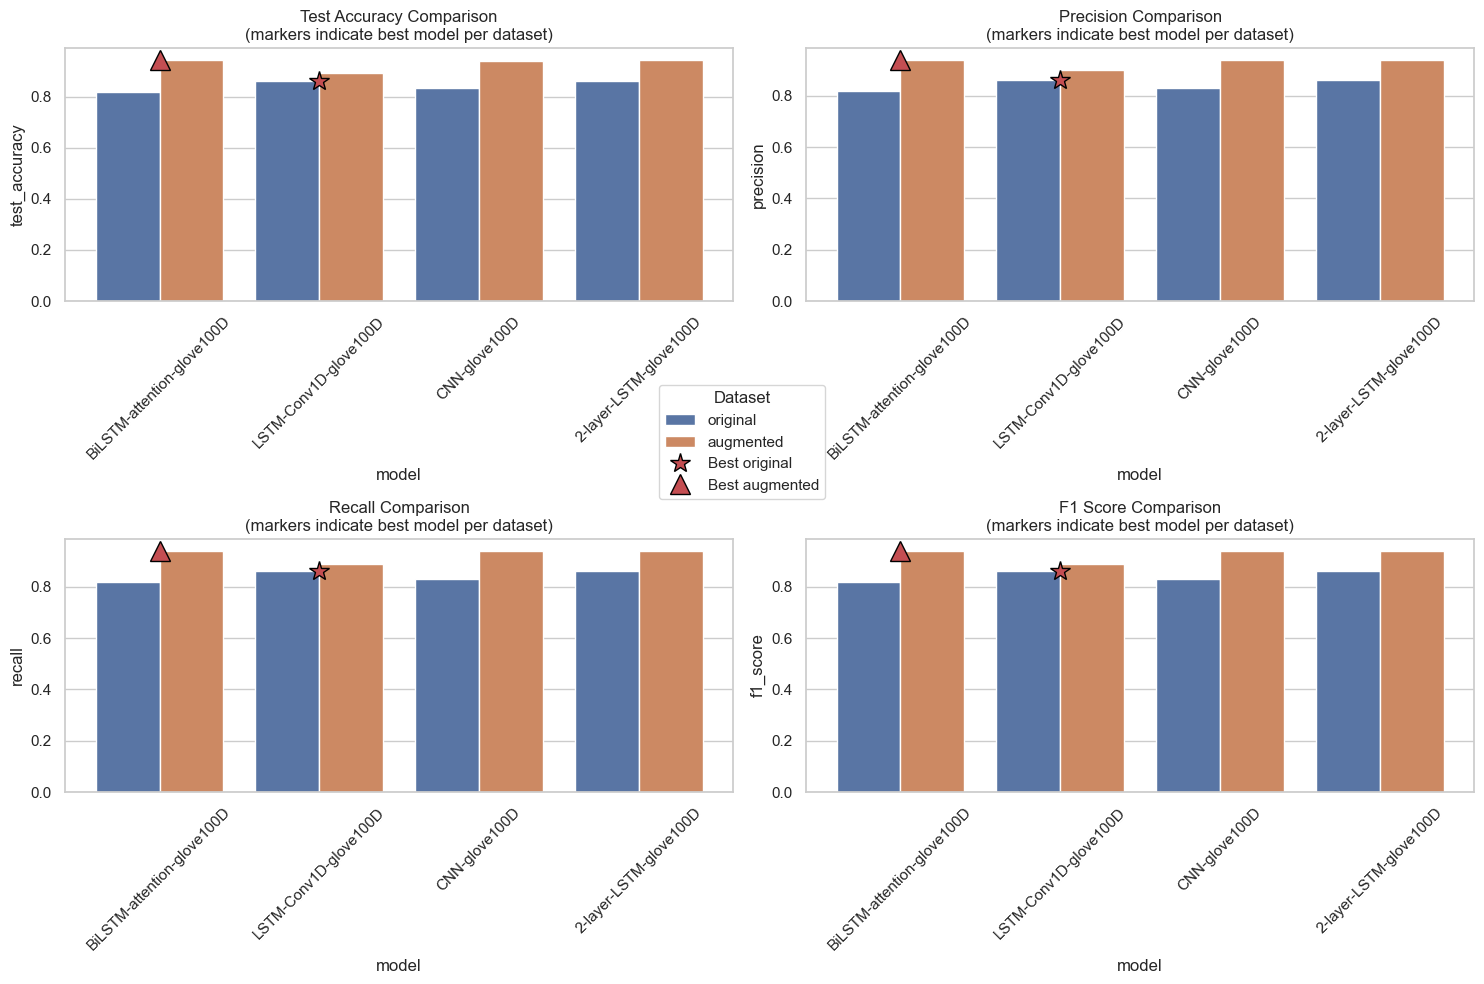

In [5]:
# Calculate the best model for each metric
best_models = {
    "test_accuracy": data.groupby("dataset")["test_accuracy"].idxmax(),
    "precision": data.groupby("dataset")["precision"].idxmax(),
    "recall": data.groupby("dataset")["recall"].idxmax(),
    "f1_score": data.groupby("dataset")["f1_score"].idxmax(),
}

# Define markers for different datasets
dataset_markers = {
    "original": "*",  # Star
    "augmented": "^",  # Triangle
}

# Create a figure with multiple subplots for different metrics
fig = plt.figure(figsize=(15, 10))


# Function to create annotated barplot
def plot_metric(position, metric, title):
    ax = plt.subplot(2, 2, position)
    sns.barplot(x="model", y=metric, hue="dataset", data=data)
    plt.title(f"{title}\n(markers indicate best model per dataset)")
    plt.xticks(rotation=45)

    # Add markers for best models
    for dataset in data["dataset"].unique():
        dataset_data = data[data["dataset"] == dataset]
        best_idx = dataset_data[metric].idxmax()
        best_value = dataset_data.loc[best_idx, metric]
        model_position = list(data["model"].unique()).index(
            dataset_data.loc[best_idx, "model"]
        )

        marker = dataset_markers.get(dataset, "o")
        plt.plot(
            model_position,
            best_value,
            marker,
            color="r",
            markersize=15,
            markeredgecolor="black",
            label=f"Best {dataset}",
        )

    # Remove legend from individual subplots
    if ax.get_legend():
        ax.get_legend().remove()
    return ax


# Create the four metric plots
plot_metric(1, "test_accuracy", "Test Accuracy Comparison")
plot_metric(2, "precision", "Precision Comparison")
plot_metric(3, "recall", "Recall Comparison")
plot_metric(4, "f1_score", "F1 Score Comparison")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc="center", bbox_to_anchor=(0.5, 0.55), title="Dataset")

plt.tight_layout()
plt.show()

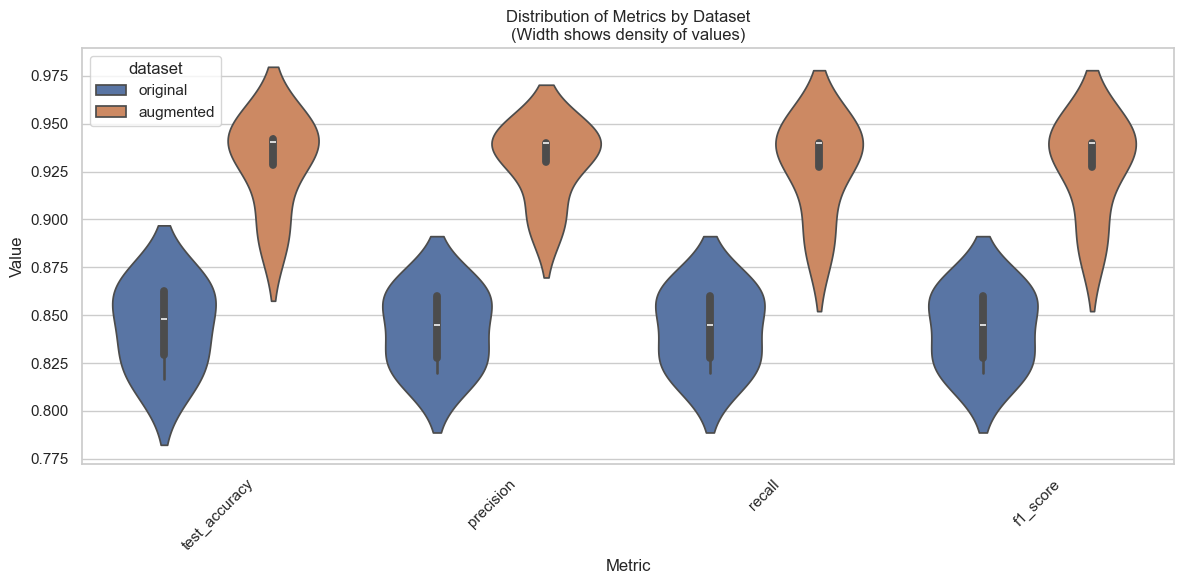

In [6]:
# Create a violin plot with highlighted means
plt.figure(figsize=(12, 6))
metrics_data = data.melt(id_vars=['model', 'dataset'], 
                        value_vars=['test_accuracy', 'precision', 'recall', 'f1_score'],
                        var_name='Metric', value_name='Value')
sns.violinplot(x='Metric', y='Value', hue='dataset', data=metrics_data)
plt.title('Distribution of Metrics by Dataset\n(Width shows density of values)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

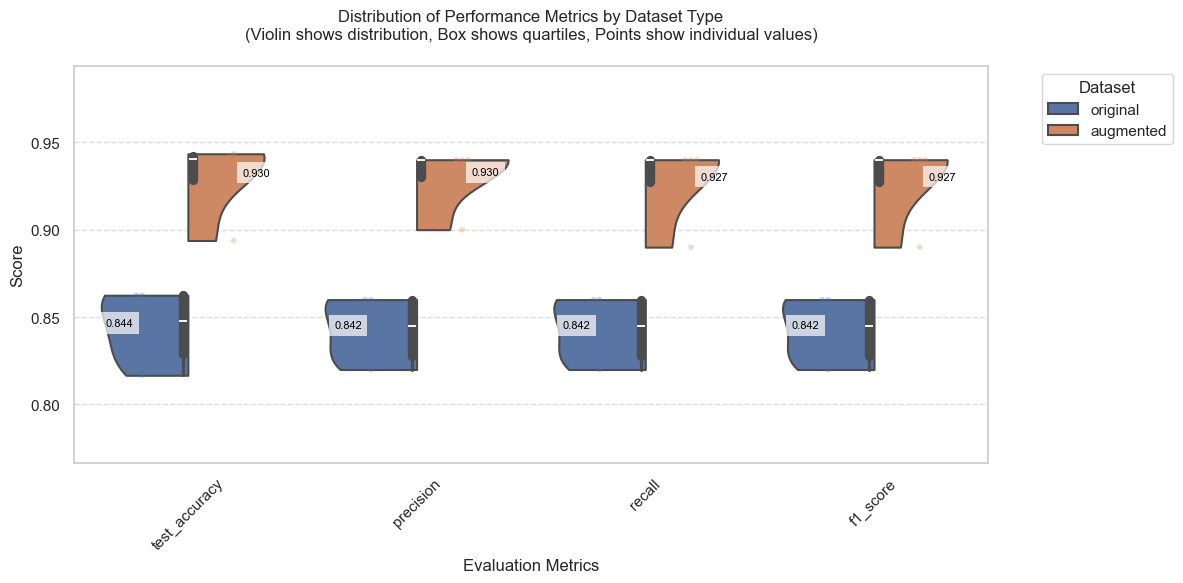


Statistical Summary by Dataset and Metric:
                          Mean  Median  Std Dev    Min    Max
dataset   Metric                                             
augmented f1_score       0.928   0.940    0.025  0.890  0.940
          precision      0.930   0.940    0.020  0.900  0.940
          recall         0.928   0.940    0.025  0.890  0.940
          test_accuracy  0.930   0.941    0.024  0.894  0.943
original  f1_score       0.842   0.845    0.021  0.820  0.860
          precision      0.842   0.845    0.021  0.820  0.860
          recall         0.842   0.845    0.021  0.820  0.860
          test_accuracy  0.844   0.848    0.023  0.817  0.862


In [7]:
# Create distribution comparison plot
plt.figure(figsize=(12, 6))

# Prepare data for plotting
metrics_data = data.melt(id_vars=['model', 'dataset'], 
                        value_vars=['test_accuracy', 'precision', 'recall', 'f1_score'],
                        var_name='Metric', value_name='Value')

# Create violin plot with additional statistical information
ax = sns.violinplot(x='Metric', y='Value', hue='dataset', data=metrics_data,
                    split=True,           # Split violins for direct dataset comparison
                    inner='box',          # Show box plot inside violin
                    cut=0,               # Cut off violin plots at observed data limits
                    linewidth=1.5)        # Make the outline more visible

# Add individual points for transparency
sns.swarmplot(x='Metric', y='Value', hue='dataset', data=metrics_data,
              size=4, alpha=0.3, dodge=True)

# Calculate and annotate means
for i, metric in enumerate(metrics_data['Metric'].unique()):
    for j, dataset in enumerate(metrics_data['dataset'].unique()):
        metric_data = metrics_data[(metrics_data['Metric'] == metric) & 
                                 (metrics_data['dataset'] == dataset)]
        mean_val = metric_data['Value'].mean()
        
        # Calculate position for annotation
        x_pos = i + (0.3 if j == 1 else -0.3)  # Adjust x position based on dataset
        
        # Add mean value annotation
        plt.text(x_pos, mean_val, f'{mean_val:.3f}',
                horizontalalignment='center',
                verticalalignment='bottom',
                fontsize=8,
                color='black',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Customize the plot
plt.title('Distribution of Performance Metrics by Dataset Type\n' +
          '(Violin shows distribution, Box shows quartiles, Points show individual values)',
          pad=20)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2],  # Only keep one set of legend entries
          title='Dataset', 
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Set y-axis limits with some padding
plt.ylim(metrics_data['Value'].min() - 0.05, metrics_data['Value'].max() + 0.05)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nStatistical Summary by Dataset and Metric:")
summary = metrics_data.groupby(['dataset', 'Metric'])['Value'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(summary)


Improvement Analysis (Augmented vs Original):
               Original  Augmented  Improvement (%)  Absolute Improvement
Metric                                                                   
precision         0.842      0.930            10.39                 0.087
test_accuracy     0.844      0.930            10.18                 0.086
f1_score          0.842      0.928            10.09                 0.085
recall            0.842      0.928            10.09                 0.085


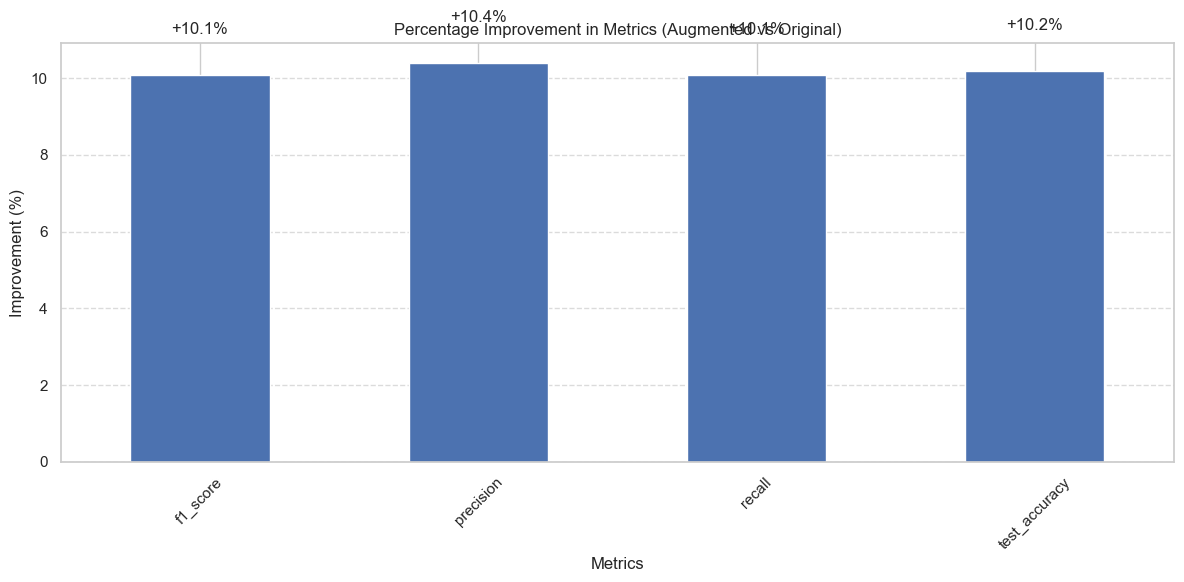

In [8]:
# Calculate improvement percentages
print("\nImprovement Analysis (Augmented vs Original):")
print("=" * 50)

# Group by metric and dataset
grouped_metrics = metrics_data.groupby(['Metric', 'dataset'])['Value'].mean().unstack()

# Calculate percentage improvement
improvement = ((grouped_metrics['augmented'] - grouped_metrics['original']) / grouped_metrics['original'] * 100).round(2)

# Create a summary DataFrame
improvement_summary = pd.DataFrame({
    'Original': grouped_metrics['original'].round(3),
    'Augmented': grouped_metrics['augmented'].round(3),
    'Improvement (%)': improvement
})

# Add absolute improvement
improvement_summary['Absolute Improvement'] = (grouped_metrics['augmented'] - grouped_metrics['original']).round(3)

# Sort by percentage improvement
improvement_summary = improvement_summary.sort_values('Improvement (%)', ascending=False)

# Display the results
print(improvement_summary)

# Create a bar plot to visualize improvements
plt.figure(figsize=(12, 6))
improvement.plot(kind='bar')
plt.title('Percentage Improvement in Metrics (Augmented vs Original)')
plt.xlabel('Metrics')
plt.ylabel('Improvement (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(improvement):
    plt.text(i, v + (1 if v >= 0 else -2), 
             f'{v:+.1f}%',
             ha='center',
             va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()
